<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/XGBoost/04_check_xgboost_is_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [567]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


from xgboost import XGBClassifier

# **Info**
---


@By: Steven Bernal

@Nickname: Kaiziferr

@Git: https://github.com/Kaiziferr

# **Diccionario de datos**
---
- `Name`: time window name.
- `Netflows`: number of netflows in the time window.
- `First_Protocol`: top 1 of main protocols used in the time window.
- `Second_Protocol`: top 2 of main protocols used in the time window.
- `Third_Protocol`: top 3 of main protocols used in the time window.
- `p1_d`: 25% of the percentiles of all durations in the time window
- `p2_d`: 50% of the percentiles of all durations in the time window
- `p3_d`: 75% of the percentiles of all durations in the time window
- `duration`: total duration of time window
- `max_d`: maximum value of all durations within the time window.
- `min_d`: minium value of all durations within the time window.
- `#packets`: total number of packets in the time window.
- `Avg_bps`: average bits per second within the time window.
- `Avg_pps`: average packets per second within the time window.
- `Avg_bpp`: average bytes per second within the time window.
- `#Bytes`: ntotal number of bytes in the time window.
- `#sp`: total number of source ports used within the time window.
- `#dp`: total number of destination (end) ports used within the time window
- `first_sp`: top 1 of the source ports in the time window.
- `second_sp`: top 2 of the source ports in the time window.
- `third_sp`: top 3 of the source ports in the time window.
- `first_dp`: top 1 of the destination ports in the time window.
- `second_dp`: top 2 of the destination ports in the time window.
- `third_dp`: top 3 of the destination ports in the time window.
- `p1_ip`: 25% of the percentiles of all packet entries within the time window.
- `p2_ip`: 50% of the percentiles of all packet entries within the time window.
- `p3_ip`: 75% of the percentiles of all packet entries within the time window.
- `p1_ib`: 25% of the percentiles of all bytes entries within the time window.
- `p2_ib`: 50% of the percentiles of all bytes entries within the time window.
- `p3_ib`: 75% of the percentiles of all bytes entries within the time window.
- `Type`: cryptocurrency type
  - `benignas`: 0
  - `bitcash`: 1
  - `bitcoin`: 2
  - `ethereum `: 3
  - `monero`: 4
  - `litecoin`: 5

# **Config**

---



In [568]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.2f}'.format)
title_data = 'Traffic Cryptocurrency'
paleta = sns.color_palette('Set2').as_hex()
random_seed=73
np.set_printoptions(precision=5, suppress=True)

warnings.filterwarnings("ignore")

#**Functions**
---

In [569]:
def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  try:
    paleta = paleta if paleta !=None else sns.color_palette('Set2').as_hex()
    v = kwards
    ejeX = v["ejeX"]

    fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
    fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

    if type(ejeX) == str:
      sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
    else:
      ejeX = v['ejeX'][0]
      sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

    ax.set_ylabel(v['ejey'], size = 12)
    ax.set_xlabel(ejeX, size=fontsize-3)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
    for p in ax.patches:
      try:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center")
      except:
        pass

  except Exception as e:
    print(e)



# **Data**
---

In [570]:
url = 'https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv'
data = pd.read_csv(url, dtype=str).drop('Unnamed: 0', axis=1)

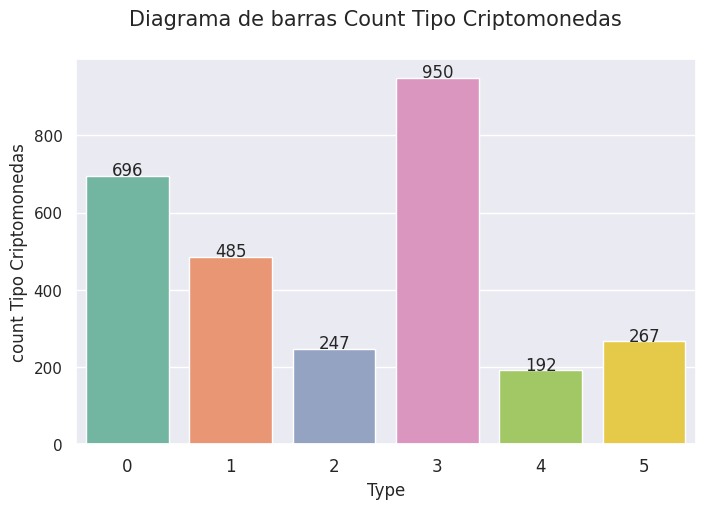

In [571]:
plot_bar(
    data,
    paleta=None,
    ejeX='Type',
    ejey='count Tipo Criptomonedas',
    title='Count Tipo Criptomonedas')

In [572]:
data.head()

,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,0-csves/0.csv,65,TCP,UDP,NaN,18.939,168.173,194.287,7845.125999999999,244.362,...,443,80.0,123.0,3.0,7.0,22.0,127.0,255.0,1888.0,0
1,0-csves/1.csv,18,UDP,TCP,NaN,0.0,0.0,0.0,0.086,0.044,...,443,53.0,53195.0,1.0,1.0,1.0,37.0,47.0,64.0,0
2,1-csves/0.csv,10,UDP,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,53,39308.0,54454.0,1.0,1.0,1.0,34.0,43.0,61.75,0
3,1-csves/1.csv,2771,UDP,TCP,ICMP6,0.0,0.0,0.0,8548.902,149.034,...,53,5355.0,443.0,1.0,1.0,1.0,39.0,49.0,54.0,0
4,2-csves/0.csv,2,UDP,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,48871,53.0,NaN,1.0,1.0,1.0,37.0,41.0,45.0,0


**Change data type**

In [573]:
data[[
    'p1_d', 'p2_d', 'p3_d',
    'duration', 'max_d', 'min_d',
    'Avg_bps', 'Avg_pps','Avg_bpp',
    'p1_ip', 'p2_ip', 'p3_ip',
    'p1_ib', 'p2_ib','p3_ib']] = data[[
    'p1_d', 'p2_d', 'p3_d',
    'duration', 'max_d', 'min_d',
    'Avg_bps', 'Avg_pps','Avg_bpp',
    'p1_ip', 'p2_ip', 'p3_ip',
    'p1_ib', 'p2_ib','p3_ib']].astype('float64')


In [574]:
data[[
    'Netflows', '#packets',
    '#Bytes', '#sp', '#dp']] = data[[
    'Netflows', '#packets',
    '#Bytes', '#sp', '#dp']].astype('int64')

# **Data Split**
---

For the purposes of this exercise, I will use two categories of cryptocurrencies because I do not want to deal with the issue of imbalanced data at this time.

In [575]:
data = data[
    (data['Type'] == "2")
    |
    (data['Type'] == "5")]
data = data.reset_index()

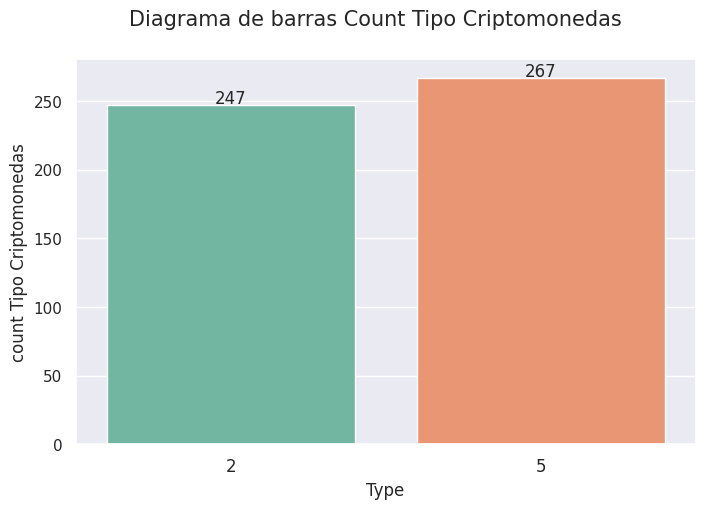

In [576]:
plot_bar(
    data,
    paleta=None,
    ejeX='Type',
    ejey='count Tipo Criptomonedas',
    title='Count Tipo Criptomonedas')

While categorical variables could be used, for the purposes of this exercise, quantitative variables will be used.

In [577]:
X = data.select_dtypes(include=['float64', 'int64'])
y = data.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)
X = X[['p1_d', 'p2_d', 'min_d', 'Avg_bpp', 'p1_ip', 'p2_ip', 'p3_ip', 'p2_ib']]

In [578]:
X

,p1_d,p2_d,min_d,Avg_bpp,p1_ip,p2_ip,p3_ip,p2_ib
0,114.79,180.04,114.74,394.00,10.00,12.50,15.00,"3,820.00"
1,196.18,196.19,196.18,469.00,10.50,11.00,11.50,"5,159.00"
2,244.14,244.14,244.14,425.00,16.00,16.00,16.00,"6,807.50"
3,244.05,244.05,244.05,419.00,16.00,16.00,16.00,"6,707.00"
4,246.79,246.79,246.79,376.00,17.75,18.50,19.25,"6,959.50"
...,...,...,...,...,...,...,...,...
509,2.16,4.32,0.00,424.00,1.25,1.50,1.75,636.50
510,583.37,583.81,582.93,336.00,53.50,55.00,56.50,"18,532.50"
511,288.55,288.55,288.55,318.00,22.25,22.50,22.75,"7,165.00"
512,285.38,285.38,285.38,329.00,24.75,25.50,26.25,"8,400.00"


I will simulate overfitting in the model reducing the test data.

In [579]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.06,
    random_state = random_seed,
    shuffle=True,
    stratify=y
)

# **Model**
---

In [580]:
modelX = XGBClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    random_state = random_seed,
)

modelX.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=73, ...)

In [581]:
y_train_predict = modelX.predict(X_train)
y_test_predict = modelX.predict(X_test)

In [582]:
train_accuracy = accuracy_score(y_train, y_train_predict)
val_accuracy = accuracy_score(y_test, y_test_predict)

In [583]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9979
Validation Accuracy: 0.8710


In [584]:
train_accuracy - val_accuracy

0.12696186468977488

In [585]:
if (train_accuracy - val_accuracy) > 0.1:
  print("Warnings: The model may be overfitting!")

Warnings: The model may be overfitting!


**Learning Curves**

In [586]:
modelX

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=73, ...)

In [587]:
results = modelX.evals_result()
results.keys()

dict_keys(['validation_0', 'validation_1'])

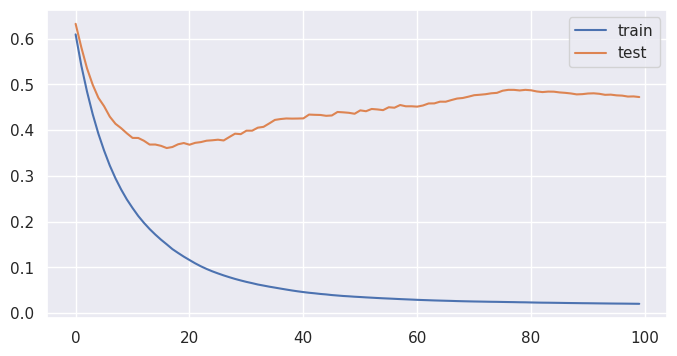

In [588]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(results['validation_0']['logloss'], label='train')
ax.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()